## Müşteri Segmantasyonu

**Amaç: Müşteri verilerini analiz ederek benzer özellikteki müşterileri segmentlere ayırmak.**

- Hedefli kampanyalar oluşturmak,
- Müşteri davranışlarını anlamak,
- Şirketin stratejik kararlarına katkı sağlamak.


In [1]:
import pandas as pd #veriyi okuma ve tanıma için pandas kütüphanesini kullandım

In [2]:
#dosya okuma: openpyxl motoru .xlsx dosyalarını okur
musteri_verileri = pd.read_excel('musteri_verileri.xlsx', engine='openpyxl')

# Verinin İlk İncelenmesi
- İlk 5 satır
- Kaç satır kaç sütun var
- Hangi sütunlar var ve veri tipleri neler

In [3]:
musteri_verileri.head() #bu komutun varsayılan parametresi 5'tir = musteri_verileri.head(5) istersen parantez içini değiştirebiliriz

,customer_id,age,gender,region,num_loans,total_spent,activity_score,income_level
0,CUST0001,56,Kadın,Marmara,2,8213,80.37,Alt
1,CUST0002,69,Kadın,İç Anadolu,2,11303,81.78,Üst
2,CUST0003,46,Kadın,Karadeniz,2,10804,97.89,Alt
3,CUST0004,32,Erkek,Doğu Anadolu,1,10420,50.19,Alt
4,CUST0005,60,Kadın,Karadeniz,0,7512,45.50,Orta


In [4]:
print(len(musteri_verileri))

1000


In [5]:
print(len(musteri_verileri.columns))

8


In [6]:
musteri_verileri.columns

Index(['customer_id', 'age', 'gender', 'region', 'num_loans', 'total_spent',
       'activity_score', 'income_level'],
      dtype='object')

In [7]:
musteri_verileri.dtypes

customer_id        object
age                 int64
gender             object
region             object
num_loans           int64
total_spent         int64
activity_score    float64
income_level       object
dtype: object

# Eksik ve Aykırı Değer Analizi

In [8]:
musteri_verileri.isnull()

,customer_id,age,gender,region,num_loans,total_spent,activity_score,income_level
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [9]:
musteri_verileri.isnull().mean() #mean ile yüzdesel eksikleri görmeyi amaçladım

customer_id       0.0
age               0.0
gender            0.0
region            0.0
num_loans         0.0
total_spent       0.0
activity_score    0.0
income_level      0.0
dtype: float64

In [10]:
#aykırı yaş değerlerini kontrol ettim.
musteri_verileri[(musteri_verileri["age"] < 18) | (musteri_verileri["age"] > 110)]

,customer_id,age,gender,region,num_loans,total_spent,activity_score,income_level


# Veriyi Görsel Analiz Etme (Exploratory Data Analysis-EDA)

In [11]:
musteri_verileri.describe()

,age,num_loans,total_spent,activity_score
count,1000.00000,1000.000000,1000.00000,1000.000000
mean,43.81900,2.026000,9827.61100,49.194630
std,14.99103,1.389696,2454.56548,28.980324
min,18.00000,0.000000,2073.00000,0.020000
25%,31.00000,1.000000,8218.25000,24.012500
50%,44.00000,2.000000,9909.00000,48.235000
75%,56.00000,3.000000,11468.25000,75.650000
max,69.00000,7.000000,17880.00000,99.950000


In [12]:
musteri_verileri["total_spent"].describe() #sadece belirli bi satıra bakmak istersek

count     1000.00000
mean      9827.61100
std       2454.56548
min       2073.00000
25%       8218.25000
50%       9909.00000
75%      11468.25000
max      17880.00000
Name: total_spent, dtype: float64

In [13]:
musteri_verileri["gender"].value_counts()

gender
Kadın    524
Erkek    476
Name: count, dtype: int64

In [14]:
musteri_verileri["region"].value_counts()

region
Akdeniz         157
İç Anadolu      153
Doğu Anadolu    148
Karadeniz       143
Marmara         140
Güneydoğu       134
Ege             125
Name: count, dtype: int64

In [15]:
musteri_verileri["income_level"].value_counts()

income_level
Orta    504
Alt     313
Üst     183
Name: count, dtype: int64

In [16]:
print(musteri_verileri["gender"].value_counts())
print(musteri_verileri["region"].value_counts())
print(musteri_verileri["income_level"].value_counts()) # 3 bilgiyi de aynı anda bu şekilde sorguladım

gender
Kadın    524
Erkek    476
Name: count, dtype: int64
region
Akdeniz         157
İç Anadolu      153
Doğu Anadolu    148
Karadeniz       143
Marmara         140
Güneydoğu       134
Ege             125
Name: count, dtype: int64
income_level
Orta    504
Alt     313
Üst     183
Name: count, dtype: int64


# Grafiksel Gösterim

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

<Axes: ylabel='Frequency'>

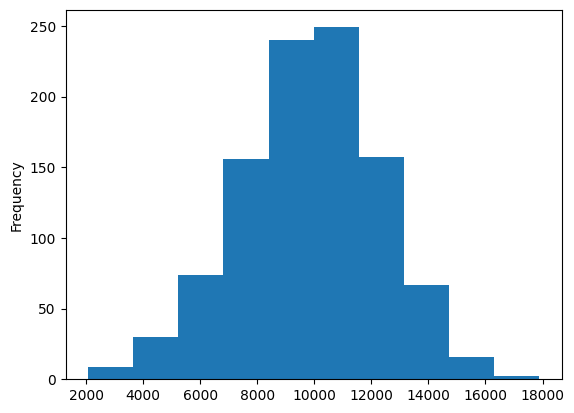

In [19]:
musteri_verileri["total_spent"].plot.hist() #harcama dağılımını histogram ile gösterdim

<Axes: ylabel='Density'>

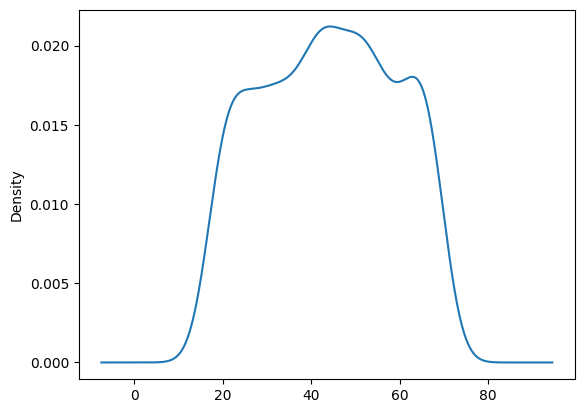

In [20]:
musteri_verileri["age"].plot.kde() # yaş dağılımı için yoğunluk grafiği (kde) çizdim
#Kernel Density Estimation Çekirdek Yoğunluk Tahmini veya Çekirdek Yoğunluk Eğrisi

# Veri Temizliği


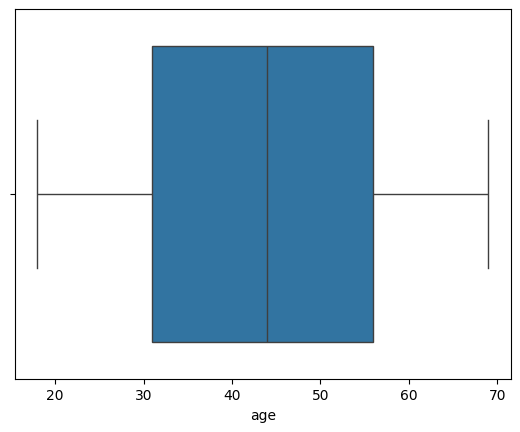

In [21]:
# Outlier Tespiti yaptım
sns.boxplot(x=musteri_verileri["age"])
plt.show()
# outlier varsa kutu dışında gözükür. bu tespiti her değişken için yaptım

<Axes: xlabel='total_spent'>

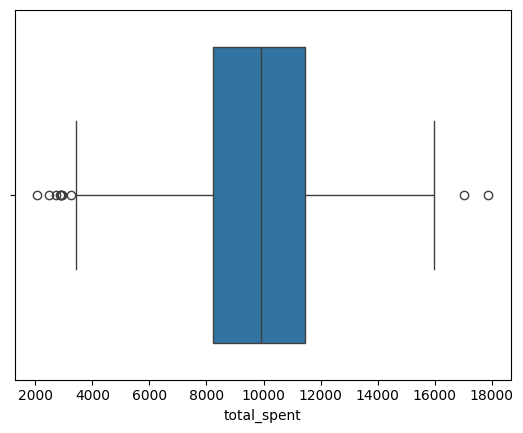

In [22]:
sns.boxplot(x=musteri_verileri["total_spent"])

<Axes: xlabel='activity_score'>

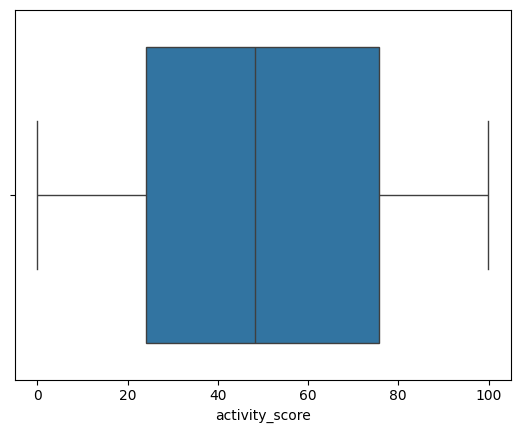

In [23]:
sns.boxplot(x=musteri_verileri["activity_score"])

<Axes: xlabel='num_loans'>

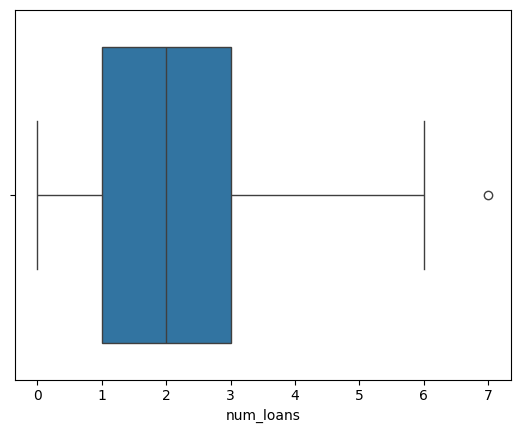

In [24]:
sns.boxplot(x=musteri_verileri["num_loans"])

<Axes: xlabel='age', ylabel='Count'>

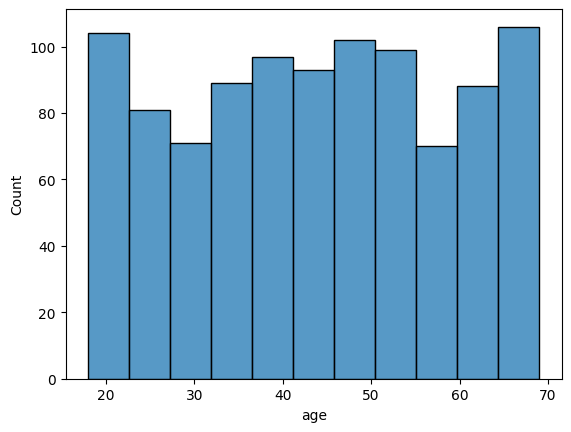

In [25]:
sns.histplot(data = musteri_verileri, x="age")

<Axes: xlabel='total_spent', ylabel='Count'>

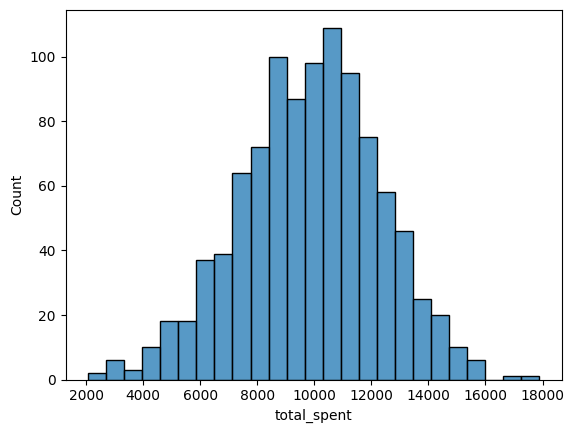

In [26]:
sns.histplot(data=musteri_verileri, x="total_spent")

<Axes: xlabel='activity_score', ylabel='Count'>

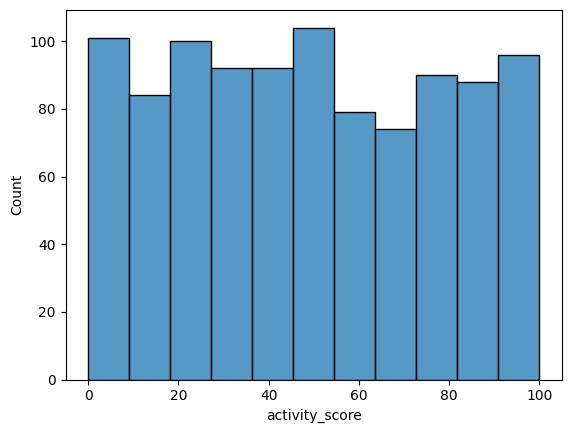

In [27]:
sns.histplot(data=musteri_verileri, x="activity_score")

<Axes: xlabel='num_loans', ylabel='Count'>

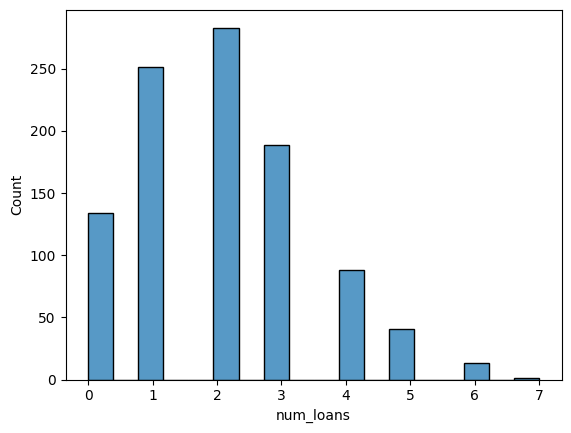

In [28]:
sns.histplot(data=musteri_verileri, x="num_loans")

# Veriyi Ölçeklendirme
- Yani tüm sayısal verileri aynı düzeye getireceğim ki algoritma adil şekilde işlem yapabilsin.
- Projemde K-Means algoritması kullanıyorum. Bu algoritma Euclidean (Öklidyen) mesafe hesaplıyor. Eğer veriler farklı ölçeklerdeyse (örneğin yaş 18–90 arası, harcama 0–10000 arası), büyük sayılar küçük sayılardan daha etkili olur. Bu da yanlış kümelenmeye sebep olur.

In [29]:
from sklearn.preprocessing import StandardScaler #scikit-learn kütüphanesinin içinden StandardScaler sınıfını içe aktardım. 
# StandardScaler her özelliğin ortalamasını=0 standart sapmasını=1 olacak şekilde standardize eder

**K-Means algoritması ile segmantasyon yapacağm. Bu algoritma ölçeklenmiş verilere ihtiyaç duyar. Bu yüzden aşağıda seçtiğim 4 özelliği StandardScaler ile normalize ettim.**

In [30]:
features = ["age", "total_spent", "activity_score", "num_loans"]

In [31]:
scaler = StandardScaler()

In [32]:
scaled = scaler.fit_transform(musteri_verileri[features]) #scale işlemini yaptım(ölçekleme)

In [33]:
scaled_df=pd.DataFrame(data=scaled, columns=features) # scale sonucunun tablosunu oluşturup K-Meanse verdim

In [34]:
scaled_df.head()

,age,total_spent,activity_score,num_loans
0,0.812959,-0.658128,1.076281,-0.018718
1,1.680578,0.601380,1.124959,-0.018718
2,0.145560,0.397984,1.681132,-0.018718
3,-0.788799,0.241462,0.034364,-0.738660
4,1.079919,-0.943861,-0.127551,-1.458602


In [35]:
import matplotlib.pyplot as plt

In [36]:
X = scaled_df.iloc[:, :].values
# Scaled_df içindeki tüm sayısal değerleri alıp,
# Pandas DataFrame’den NumPy dizisine çevirdim.
# Çünkü KMeans gibi algoritmalar NumPy array ile çalışır. ( NumPy Array: Sayısal veri saklayan çok hızlı yapılar)

# K-Means Kümeleme Clustering
- K-Means, denetimsiz (unsupervised) öğrenmede kullanılan bir kümeleme algoritmasıdır.
- ilk olarak 3 küme ile deneme yaptım
- k-means++ ile daha iyi başlangıç noktaları bulmayı amaçladım
- modeli fit() ile eğittim

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans ( n_clusters =3, init = 'k-means++')
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


# Elbow Yöntemi
- Kaç küme olmalı sorusunun cevabını bu yöntemle cevapladım. Bu yöntemde önemli olan nokta dirsek noktası denilen kırılan noktanın küme sayısını belirlemesidir.

 
- Küme sayısı arttıkça her kümenin içindeki hata azalır. (inertia değeri düşer.)
- Ama bir noktadan sonra hata azalması yavaşlar, orada bir “dirsek (elbow)” oluşur.
- Bu dirsek noktası, en verimli küme sayısını gösterir.
- cluster centers'ları görüyoruz

[[ 0.98611675 -0.24420489 -0.33937682  0.37198166]
 [-0.75933227  0.17007267 -0.74001425 -0.20817687]
 [-0.19319594  0.06646772  1.10424385 -0.15398029]]


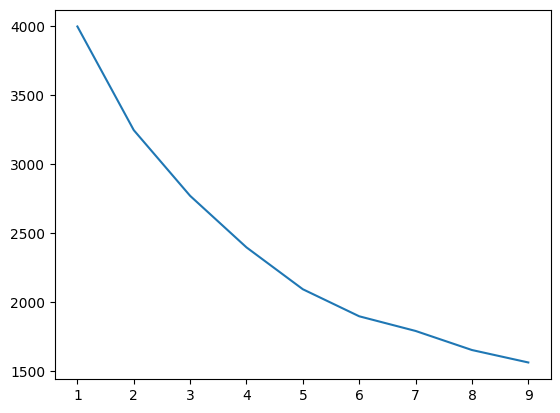

In [39]:
print(kmeans.cluster_centers_)
sonuclar = []
for i in range(1,10):
    kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state=123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)
plt.plot(range(1,10),sonuclar)

# Silhoutte Score Yöntemi
- Bu yöntem kümelerin birbirinden ne kadar ayrı olduğunu ölçmede kullanılır.
- 1'e ne kadar yakınsa o kadar iyidir bizim için.
- En yüksek skor hangi k değerindeyse onu kullanmak mantıklıdır.

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_scores = []
k_values = range(2, 11)  # 2'den 10'a kadar olan k değerlerini deniyoruz

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)



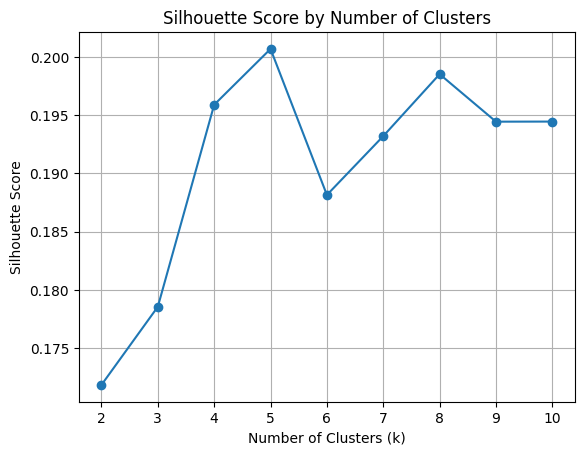

In [42]:
# Skorları çizdirme
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

**Kümeleme ve görselleştirme sonucunda en uygun k değeri 5'tir. Modeli buna göre tekrardan eğittim.**

[0 0 3 3 0 3 1 2 3 1 1 3 3 1 1 1 3 1 3 1 2 1 0 1 3 1 2 3 1 2 0 1 0 1 0 3 0
 0 0 0 3 0 0 2 3 2 2 2 3 3 2 0 2 2 1 3 1 0 2 0 3 0 2 3 1 2 0 0 3 3 2 0 1 2
 1 0 0 1 3 1 1 0 2 3 1 3 1 0 1 3 0 3 2 0 1 1 0 2 1 3 0 1 3 3 1 3 3 0 2 0 1
 1 1 3 0 0 0 1 1 1 2 0 3 1 1 1 2 3 0 3 0 2 1 0 0 2 3 0 3 0 2 0 1 1 2 1 0 3
 2 3 1 1 1 0 2 3 2 3 1 2 2 0 1 0 1 2 2 2 1 0 0 1 1 0 2 0 3 2 1 1 2 3 2 0 0
 1 2 3 1 1 3 2 3 3 1 0 2 0 1 1 3 1 1 1 2 3 1 0 0 1 3 0 1 2 1 2 1 0 0 1 0 3
 3 2 0 2 3 0 3 3 0 1 0 2 2 3 1 3 0 1 2 1 2 1 1 0 2 0 3 0 1 3 1 3 0 3 0 1 2
 2 1 3 1 2 0 2 1 1 3 1 3 0 0 2 2 0 3 0 3 3 2 1 0 1 2 0 2 1 3 1 3 2 0 0 1 3
 0 1 3 0 1 3 0 2 1 0 3 2 3 1 0 1 0 2 2 1 3 2 2 1 1 0 0 0 1 0 1 1 1 2 2 3 0
 0 0 1 1 3 2 0 1 3 2 3 3 0 2 1 0 3 1 2 1 0 2 0 0 1 2 3 0 1 3 2 1 1 0 3 0 3
 3 0 2 1 2 0 2 0 0 3 1 0 0 3 3 0 2 1 0 3 0 3 2 3 1 3 1 1 0 3 1 1 0 2 0 0 2
 3 3 3 3 2 1 2 2 1 2 3 2 0 0 2 0 0 0 2 2 1 1 3 0 1 3 1 3 0 3 3 1 0 3 3 0 1
 3 1 3 2 1 2 1 3 0 0 0 1 3 1 0 0 3 0 0 3 0 3 3 0 0 2 2 2 2 1 2 3 3 0 0 0 0
 2 1 1 0 2 1 1 1 2 1 1 0 

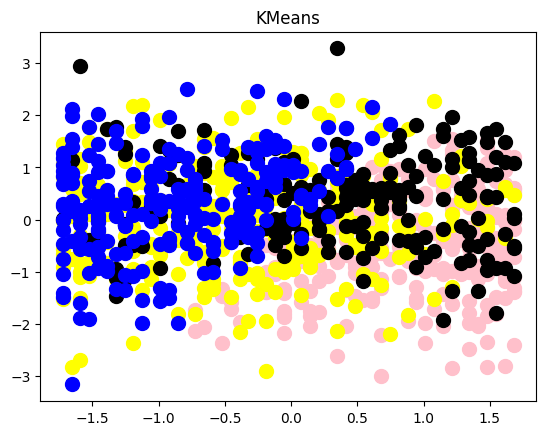

In [43]:
kmeans = KMeans (n_clusters = 4, init = 'k-means++', random_state = 123)
Y_tahmin = kmeans.fit_predict(X)
print(Y_tahmin)
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='pink')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='yellow')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='black')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='blue')
plt.title('KMeans')
plt.show()

# Kümelere Etiket Verme ve Segment Analizi

In [44]:
musteri_verileri['kume'] = Y_tahmin

In [45]:
musteri_verileri.head()

,customer_id,age,gender,region,num_loans,total_spent,activity_score,income_level,kume
0,CUST0001,56,Kadın,Marmara,2,8213,80.37,Alt,0
1,CUST0002,69,Kadın,İç Anadolu,2,11303,81.78,Üst,0
2,CUST0003,46,Kadın,Karadeniz,2,10804,97.89,Alt,3
3,CUST0004,32,Erkek,Doğu Anadolu,1,10420,50.19,Alt,3
4,CUST0005,60,Kadın,Karadeniz,0,7512,45.50,Orta,0


In [46]:
musteri_verileri.groupby("kume").mean(numeric_only=True)

,age,num_loans,total_spent,activity_score
kume,,,,
0,56.779412,1.569853,8505.022059,63.948456
1,38.587629,1.343643,9827.570447,20.221615
2,49.092308,3.907692,10698.810256,39.526205
3,31.293388,1.842975,10612.206612,75.241942


In [51]:
segment_isimleri = {
    0: "Geleneksel Müşteriler",
    1: "Pasif Harcayıcılar",
    2: "Kredi Odaklılar",
    3: "Dijital Aktifler"
}

In [52]:
musteri_verileri["segment_ismi"] = musteri_verileri["kume"].map(segment_isimleri)

In [53]:
musteri_verileri[["customer_id", "kume", "segment_ismi"]].head()

,customer_id,kume,segment_ismi
0,CUST0001,0,Geleneksel Müşteriler
1,CUST0002,0,Geleneksel Müşteriler
2,CUST0003,3,Dijital Aktifler
3,CUST0004,3,Dijital Aktifler
4,CUST0005,0,Geleneksel Müşteriler


In [54]:
musteri_verileri.groupby("kume")[["age", "num_loans", "total_spent", "activity_score"]].mean().round(1)

,age,num_loans,total_spent,activity_score
kume,,,,
0,56.8,1.6,8505.0,63.9
1,38.6,1.3,9827.6,20.2
2,49.1,3.9,10698.8,39.5
3,31.3,1.8,10612.2,75.2


In [55]:
musteri_verileri.to_excel("guncellenmis_musteri_verileri.xlsx", index=False)